Import modules

In [226]:
import pandas as pd
import numpy as np
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

Change configuration in pandas so all columns of a dataframe are displayed.

In [227]:
pd.options.display.max_columns = 100
pd.set_option('display.max_rows', None)

Read in api from open5e.com.
This contains information on all spells from Dunegeons & Dragons.
Data source: https://open5e.com/

In [228]:
r = requests.get("https://api.open5e.com/spells/?limit=1000")
r2 = r.json()['results']
open5e = pd.DataFrame(data=r2)
open5e.head()

,slug,name,desc,higher_level,page,range,components,material,ritual,duration,concentration,casting_time,level,level_int,school,dnd_class,archetype,circles,document__slug,document__title,document__license_url
0,abhorrent-apparition,Abhorrent Apparition,You imbue a terrifying visage onto a gourd and...,If you cast this spell using a spell slot of 5...,,60 feet,M,a gourd with a face carved on it,no,Instantaneous,no,1 action,4th-level,4,illusion,"Bard, Sorcerer, Wizard",,,dmag,Deep Magic for 5th Edition,http://open5e.com/legal
1,accelerate,Accelerate,Choose up to three willing creatures within ra...,When you cast this spell using a spell slot of...,,Touch,"V, S, M",a toy top,no,Up to 1 minute,yes,1 action,3rd-level,3,transmutation,"Bard, Cleric, Druid, Sorcerer, Wizard",,,dmag,Deep Magic for 5th Edition,http://open5e.com/legal
2,acid-arrow,Acid Arrow,A shimmering green arrow streaks toward a targ...,When you cast this spell using a spell slot of...,phb 259,90 feet,"V, S, M",Powdered rhubarb leaf and an adder's stomach.,no,Instantaneous,no,1 action,2nd-level,2,Evocation,"Druid, Wizard",Druid: Swamp,Swamp,wotc-srd,Systems Reference Document,http://open5e.com/legal
3,acid-gate,Acid Gate,"You create a portal of swirling, acidic green ...",When you cast this spell using a spell slot of...,,60 feet,"V, S, M",a vial of acid and a polished silver mirror wo...,no,Up to 1 minute,yes,1 action,7th-level,7,conjuration,,,,dmag,Deep Magic for 5th Edition,http://open5e.com/legal
4,acid-rain,Acid Rain,You unleash a storm of swirling acid in a cyli...,When you cast this spell using a spell slot of...,,150 feet,"V, S, M",a drop of acid,no,Up to 1 minute,yes,1 action,5th-level,5,conjuration,"Sorcerer, Warlock, Wizard",,,dmag,Deep Magic for 5th Edition,http://open5e.com/legal


A count of all spells in the "open5e" dataframe. This contains more spells than I was expecting.

In [229]:
open5e.count()

slug                     835
name                     835
desc                     835
higher_level             835
page                     835
range                    835
components               835
material                 835
ritual                   835
duration                 835
concentration            835
casting_time             835
level                    835
level_int                835
school                   835
dnd_class                835
archetype                835
circles                  835
document__slug           835
document__title          835
document__license_url    835
dtype: int64

Dungeons & Dragons has had additional spells added to the game from various sources. For the purposes of this prject, I only want information from the "Player's Handbook," referenced in this data as "Systems Reference Document."

Here, I am looking for the titles of all source books.

In [230]:
print(open5e["document__title"].unique())

['Deep Magic for 5th Edition' 'Systems Reference Document' 'Open5e OGL']


Removing all source books other than the "Player's Handbook."

In [231]:
open5e = open5e.loc[open5e['document__title'] == 'Systems Reference Document']
open5e.head()

,slug,name,desc,higher_level,page,range,components,material,ritual,duration,concentration,casting_time,level,level_int,school,dnd_class,archetype,circles,document__slug,document__title,document__license_url
2,acid-arrow,Acid Arrow,A shimmering green arrow streaks toward a targ...,When you cast this spell using a spell slot of...,phb 259,90 feet,"V, S, M",Powdered rhubarb leaf and an adder's stomach.,no,Instantaneous,no,1 action,2nd-level,2,Evocation,"Druid, Wizard",Druid: Swamp,Swamp,wotc-srd,Systems Reference Document,http://open5e.com/legal
5,acid-splash,Acid Splash,You hurl a bubble of acid. Choose one creature...,,phb 211,60 feet,"V, S",,no,Instantaneous,no,1 action,Cantrip,0,Conjuration,"Sorcerer, Wizard",,,wotc-srd,Systems Reference Document,http://open5e.com/legal
9,aid,Aid,Your spell bolsters your allies with toughness...,When you cast this spell using a spell slot of...,phb 211,30 feet,"V, S, M",A tiny strip of white cloth.,no,8 hours,no,1 action,2nd-level,2,Abjuration,"Cleric, Paladin",,,wotc-srd,Systems Reference Document,http://open5e.com/legal
10,alarm,Alarm,You set an alarm against unwanted intrusion. C...,,phb 211,30 feet,"V, S, M",A tiny bell and a piece of fine silver wire.,yes,8 hours,no,1 minute,1st-level,1,Abjuration,"Ranger, Ritual Caster, Wizard",,,wotc-srd,Systems Reference Document,http://open5e.com/legal
16,alter-self,Alter Self,You assume a different form. When you cast the...,,phb 211,Self,"V, S",,no,Up to 1 hour,yes,1 action,2nd-level,2,Transmutation,"Sorcerer, Wizard",,,wotc-srd,Systems Reference Document,http://open5e.com/legal


Counting the entries again.

In [232]:
open5e.count()

slug                     319
name                     319
desc                     319
higher_level             319
page                     319
range                    319
components               319
material                 319
ritual                   319
duration                 319
concentration            319
casting_time             319
level                    319
level_int                319
school                   319
dnd_class                319
archetype                319
circles                  319
document__slug           319
document__title          319
document__license_url    319
dtype: int64

Listing all columns in the open5e dataframe.

In [233]:
open5e.reset_index(inplace=True)

In [234]:
open5e.columns

Index(['index', 'slug', 'name', 'desc', 'higher_level', 'page', 'range',
       'components', 'material', 'ritual', 'duration', 'concentration',
       'casting_time', 'level', 'level_int', 'school', 'dnd_class',
       'archetype', 'circles', 'document__slug', 'document__title',
       'document__license_url'],
      dtype='object')

Removing unneeded columns and columns that will be redundant with later data, and renaming some other columns to suit my preference.

In [235]:
open5e.drop(columns=['index','page', 'level', 'material', 'archetype', 'circles', 'document__slug', 'document__title', 'document__license_url', 'ritual', 'concentration'],
        inplace=True)
open5e.rename(columns={'slug' : 'key', 'level_int' : 'level', 'dnd_class' : 'class'}, inplace=True)
open5e.columns

Index(['key', 'name', 'desc', 'higher_level', 'range', 'components',
       'duration', 'casting_time', 'level', 'school', 'class'],
      dtype='object')

Displaying the cleaned data

In [236]:
open5e.head()

,key,name,desc,higher_level,range,components,duration,casting_time,level,school,class
0,acid-arrow,Acid Arrow,A shimmering green arrow streaks toward a targ...,When you cast this spell using a spell slot of...,90 feet,"V, S, M",Instantaneous,1 action,2,Evocation,"Druid, Wizard"
1,acid-splash,Acid Splash,You hurl a bubble of acid. Choose one creature...,,60 feet,"V, S",Instantaneous,1 action,0,Conjuration,"Sorcerer, Wizard"
2,aid,Aid,Your spell bolsters your allies with toughness...,When you cast this spell using a spell slot of...,30 feet,"V, S, M",8 hours,1 action,2,Abjuration,"Cleric, Paladin"
3,alarm,Alarm,You set an alarm against unwanted intrusion. C...,,30 feet,"V, S, M",8 hours,1 minute,1,Abjuration,"Ranger, Ritual Caster, Wizard"
4,alter-self,Alter Self,You assume a different form. When you cast the...,,Self,"V, S",Up to 1 hour,1 action,2,Transmutation,"Sorcerer, Wizard"


The initial data does not contain all of the inforamtion that I am looking for. Specifically, I want information on the damage each spell deals. I found the data in a different api, which is more difficult to work with.

In this data source, information on each spells will require a seperate api pull. This initial dataframe contains the names of each spell, along with the sub domains of the urls needed to pull the apis.

Data source: https://www.dnd5eapi.co/ 

In [237]:
r = requests.get('http://www.dnd5eapi.co/api/spells')
b = r.json()['results']
url_list = pd.DataFrame(data=b)
url_list.head()

,index,name,url
0,acid-arrow,Acid Arrow,/api/spells/acid-arrow
1,acid-splash,Acid Splash,/api/spells/acid-splash
2,aid,Aid,/api/spells/aid
3,alarm,Alarm,/api/spells/alarm
4,alter-self,Alter Self,/api/spells/alter-self


Counting the number of entries. 319 entries, matching the data from the other source.

In [238]:
url_list.count()

index    319
name     319
url      319
dtype: int64

I need to append the provided url subdirectories to the top level domain so I can run all of the apis. Here, I concatonate them and create a list.

In [239]:
spells_url = []

for url in url_list["url"]:
    spells_url.append('http://www.dnd5eapi.co' + url)

print(spells_url[0:5])

['http://www.dnd5eapi.co/api/spells/acid-arrow', 'http://www.dnd5eapi.co/api/spells/acid-splash', 'http://www.dnd5eapi.co/api/spells/aid', 'http://www.dnd5eapi.co/api/spells/alarm', 'http://www.dnd5eapi.co/api/spells/alter-self']


Reading in api for each spell, then concatonating them into a single dataframe.

In [240]:
full = []

for i in spells_url:
    data = requests.get(i)
    data_json = data.json()
    data_normal = pd.json_normalize(data_json)
    full.append(data_normal)
    

dnd5eapi = pd.concat(full)

In [241]:
dnd5eapi.reset_index(inplace=True)

In [242]:
dnd5eapi.count()

level_0                                319
index                                  319
name                                   319
desc                                   319
higher_level                           319
range                                  319
components                             319
material                               184
ritual                                 319
duration                               319
concentration                          319
casting_time                           319
level                                  319
attack_type                             16
classes                                319
subclasses                             319
url                                    319
damage.damage_type.index                64
damage.damage_type.name                 64
damage.damage_type.url                  64
damage.damage_at_slot_level.2           14
damage.damage_at_slot_level.3           17
damage.damage_at_slot_level.4           27
damage.dama

Displaying the data from dnd5eapi.co

In [243]:
dnd5eapi.head()

,level_0,index,name,desc,higher_level,range,components,material,ritual,duration,concentration,casting_time,level,attack_type,classes,subclasses,url,damage.damage_type.index,damage.damage_type.name,damage.damage_type.url,damage.damage_at_slot_level.2,damage.damage_at_slot_level.3,damage.damage_at_slot_level.4,damage.damage_at_slot_level.5,damage.damage_at_slot_level.6,damage.damage_at_slot_level.7,damage.damage_at_slot_level.8,damage.damage_at_slot_level.9,school.index,school.name,school.url,damage.damage_at_character_level.1,damage.damage_at_character_level.5,damage.damage_at_character_level.11,damage.damage_at_character_level.17,dc.dc_type.index,dc.dc_type.name,dc.dc_type.url,dc.dc_success,heal_at_slot_level.2,heal_at_slot_level.3,heal_at_slot_level.4,heal_at_slot_level.5,heal_at_slot_level.6,heal_at_slot_level.7,heal_at_slot_level.8,heal_at_slot_level.9,area_of_effect.type,area_of_effect.size,dc.desc,damage.damage_at_slot_level.1,heal_at_slot_level.1
0,0,acid-arrow,Acid Arrow,[A shimmering green arrow streaks toward a tar...,[When you cast this spell using a spell slot o...,90 feet,"[V, S, M]",Powdered rhubarb leaf and an adder's stomach.,False,Instantaneous,False,1 action,2,ranged,"[{'index': 'wizard', 'name': 'Wizard', 'url': ...","[{'index': 'lore', 'name': 'Lore', 'url': '/ap...",/api/spells/acid-arrow,acid,Acid,/api/damage-types/acid,4d4,5d4,6d4,7d4,8d4,9d4,10d4,11d4,evocation,Evocation,/api/magic-schools/evocation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,acid-splash,Acid Splash,[You hurl a bubble of acid. Choose one creatur...,[],60 feet,"[V, S]",NaN,False,Instantaneous,False,1 action,0,NaN,"[{'index': 'sorcerer', 'name': 'Sorcerer', 'ur...","[{'index': 'lore', 'name': 'Lore', 'url': '/ap...",/api/spells/acid-splash,acid,Acid,/api/damage-types/acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conjuration,Conjuration,/api/magic-schools/conjuration,1d6,2d6,3d6,4d6,dex,DEX,/api/ability-scores/dex,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,aid,Aid,[Your spell bolsters your allies with toughnes...,[When you cast this spell using a spell slot o...,30 feet,"[V, S, M]",A tiny strip of white cloth.,False,8 hours,False,1 action,2,NaN,"[{'index': 'cleric', 'name': 'Cleric', 'url': ...","[{'index': 'lore', 'name': 'Lore', 'url': '/ap...",/api/spells/aid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abjuration,Abjuration,/api/magic-schools/abjuration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,10,15,20,25,30,35,40,NaN,NaN,NaN,NaN,NaN
3,0,alarm,Alarm,[You set an alarm against unwanted intrusion. ...,[],30 feet,"[V, S, M]",A tiny bell and a piece of fine silver wire.,True,8 hours,False,1 minute,1,NaN,"[{'index': 'ranger', 'name': 'Ranger', 'url': ...","[{'index': 'lore', 'name': 'Lore', 'url': '/ap...",/api/spells/alarm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abjuration,Abjuration,/api/magic-schools/abjuration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cube,20.0,NaN,NaN,NaN
4,0,alter-self,Alter Self,[You assume a different form. When you cast th...,[],Self,"[V, S]",NaN,False,Up to 1 hour,True,1 action,2,NaN,"[{'index': 'sorcerer', 'name': 'Sorcerer', 'ur...","[{'index': 'lore', 'name': 'Lore', 'url': '/ap...",/api/spells/alter-self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,transmutation,Transmutation,/api/magic-schools/transmutation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns from the dnd5eapi data. Note that many of the columns are redundant with the open5e data. 

In [244]:
dnd5eapi.columns

Index(['level_0', 'index', 'name', 'desc', 'higher_level', 'range',
       'components', 'material', 'ritual', 'duration', 'concentration',
       'casting_time', 'level', 'attack_type', 'classes', 'subclasses', 'url',
       'damage.damage_type.index', 'damage.damage_type.name',
       'damage.damage_type.url', 'damage.damage_at_slot_level.2',
       'damage.damage_at_slot_level.3', 'damage.damage_at_slot_level.4',
       'damage.damage_at_slot_level.5', 'damage.damage_at_slot_level.6',
       'damage.damage_at_slot_level.7', 'damage.damage_at_slot_level.8',
       'damage.damage_at_slot_level.9', 'school.index', 'school.name',
       'school.url', 'damage.damage_at_character_level.1',
       'damage.damage_at_character_level.5',
       'damage.damage_at_character_level.11',
       'damage.damage_at_character_level.17', 'dc.dc_type.index',
       'dc.dc_type.name', 'dc.dc_type.url', 'dc.dc_success',
       'heal_at_slot_level.2', 'heal_at_slot_level.3', 'heal_at_slot_level.4',
       

Removing unneeded columns and redundant columns, and renaming some other columns to suit my preference.

In [245]:
dnd5eapi.drop(columns=['level_0','name', 'desc', 'higher_level', 'range', 'components', 'material', 'duration', 'casting_time', 'level', 
                       'attack_type', 'classes', 'subclasses', 'url', 'damage.damage_type.index', 'damage.damage_type.url', 'school.index', 'school.name',
                       'school.url', 'dc.dc_type.index', 'dc.dc_type.name', 'dc.dc_type.url', 'dc.dc_success', 'dc.desc'],
        inplace=True)
dnd5eapi.rename(columns={'index':'key', 'damage.damage_type.name':'damage_type'}, inplace=True)
dnd5eapi.columns

Index(['key', 'ritual', 'concentration', 'damage_type',
       'damage.damage_at_slot_level.2', 'damage.damage_at_slot_level.3',
       'damage.damage_at_slot_level.4', 'damage.damage_at_slot_level.5',
       'damage.damage_at_slot_level.6', 'damage.damage_at_slot_level.7',
       'damage.damage_at_slot_level.8', 'damage.damage_at_slot_level.9',
       'damage.damage_at_character_level.1',
       'damage.damage_at_character_level.5',
       'damage.damage_at_character_level.11',
       'damage.damage_at_character_level.17', 'heal_at_slot_level.2',
       'heal_at_slot_level.3', 'heal_at_slot_level.4', 'heal_at_slot_level.5',
       'heal_at_slot_level.6', 'heal_at_slot_level.7', 'heal_at_slot_level.8',
       'heal_at_slot_level.9', 'area_of_effect.type', 'area_of_effect.size',
       'damage.damage_at_slot_level.1', 'heal_at_slot_level.1'],
      dtype='object')

Displaying cleaned data

In [246]:
dnd5eapi.head()

,key,ritual,concentration,damage_type,damage.damage_at_slot_level.2,damage.damage_at_slot_level.3,damage.damage_at_slot_level.4,damage.damage_at_slot_level.5,damage.damage_at_slot_level.6,damage.damage_at_slot_level.7,damage.damage_at_slot_level.8,damage.damage_at_slot_level.9,damage.damage_at_character_level.1,damage.damage_at_character_level.5,damage.damage_at_character_level.11,damage.damage_at_character_level.17,heal_at_slot_level.2,heal_at_slot_level.3,heal_at_slot_level.4,heal_at_slot_level.5,heal_at_slot_level.6,heal_at_slot_level.7,heal_at_slot_level.8,heal_at_slot_level.9,area_of_effect.type,area_of_effect.size,damage.damage_at_slot_level.1,heal_at_slot_level.1
0,acid-arrow,False,False,Acid,4d4,5d4,6d4,7d4,8d4,9d4,10d4,11d4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,acid-splash,False,False,Acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d6,2d6,3d6,4d6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aid,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,10,15,20,25,30,35,40,NaN,NaN,NaN,NaN
3,alarm,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cube,20.0,NaN,NaN
4,alter-self,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Merging the two dataframes. All of the data I was looking for is now contained in a single dataframe.

In [247]:
spells = pd.merge(open5e, dnd5eapi, on='key', how='left')
spells.head()

,key,name,desc,higher_level,range,components,duration,casting_time,level,school,class,ritual,concentration,damage_type,damage.damage_at_slot_level.2,damage.damage_at_slot_level.3,damage.damage_at_slot_level.4,damage.damage_at_slot_level.5,damage.damage_at_slot_level.6,damage.damage_at_slot_level.7,damage.damage_at_slot_level.8,damage.damage_at_slot_level.9,damage.damage_at_character_level.1,damage.damage_at_character_level.5,damage.damage_at_character_level.11,damage.damage_at_character_level.17,heal_at_slot_level.2,heal_at_slot_level.3,heal_at_slot_level.4,heal_at_slot_level.5,heal_at_slot_level.6,heal_at_slot_level.7,heal_at_slot_level.8,heal_at_slot_level.9,area_of_effect.type,area_of_effect.size,damage.damage_at_slot_level.1,heal_at_slot_level.1
0,acid-arrow,Acid Arrow,A shimmering green arrow streaks toward a targ...,When you cast this spell using a spell slot of...,90 feet,"V, S, M",Instantaneous,1 action,2,Evocation,"Druid, Wizard",False,False,Acid,4d4,5d4,6d4,7d4,8d4,9d4,10d4,11d4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,acid-splash,Acid Splash,You hurl a bubble of acid. Choose one creature...,,60 feet,"V, S",Instantaneous,1 action,0,Conjuration,"Sorcerer, Wizard",False,False,Acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d6,2d6,3d6,4d6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aid,Aid,Your spell bolsters your allies with toughness...,When you cast this spell using a spell slot of...,30 feet,"V, S, M",8 hours,1 action,2,Abjuration,"Cleric, Paladin",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,10,15,20,25,30,35,40,NaN,NaN,NaN,NaN
3,alarm,Alarm,You set an alarm against unwanted intrusion. C...,,30 feet,"V, S, M",8 hours,1 minute,1,Abjuration,"Ranger, Ritual Caster, Wizard",True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cube,20.0,NaN,NaN
4,alter-self,Alter Self,You assume a different form. When you cast the...,,Self,"V, S",Up to 1 hour,1 action,2,Transmutation,"Sorcerer, Wizard",False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Count of the merged dataframe. There are 319 entries, as expected.

In [248]:
spells.count()

key                                    319
name                                   319
desc                                   319
higher_level                           319
range                                  319
components                             319
duration                               319
casting_time                           319
level                                  319
school                                 319
class                                  319
ritual                                 316
concentration                          316
damage_type                             64
damage.damage_at_slot_level.2           14
damage.damage_at_slot_level.3           17
damage.damage_at_slot_level.4           27
damage.damage_at_slot_level.5           23
damage.damage_at_slot_level.6           32
damage.damage_at_slot_level.7           30
damage.damage_at_slot_level.8           30
damage.damage_at_slot_level.9           28
damage.damage_at_character_level.1      10
damage.dama

I noticed that there 3 NaN values in the "ritual" and "concentration" columns. This should not be that case. 

In [249]:
spells['ritual'].value_counts(dropna=False)

False    287
True      29
NaN        3
Name: ritual, dtype: int64

Finding the rows with NaN in "ritual". These rows also have NaN in "concentration".

In [250]:
spells[spells['ritual'].isna()]

,key,name,desc,higher_level,range,components,duration,casting_time,level,school,class,ritual,concentration,damage_type,damage.damage_at_slot_level.2,damage.damage_at_slot_level.3,damage.damage_at_slot_level.4,damage.damage_at_slot_level.5,damage.damage_at_slot_level.6,damage.damage_at_slot_level.7,damage.damage_at_slot_level.8,damage.damage_at_slot_level.9,damage.damage_at_character_level.1,damage.damage_at_character_level.5,damage.damage_at_character_level.11,damage.damage_at_character_level.17,heal_at_slot_level.2,heal_at_slot_level.3,heal_at_slot_level.4,heal_at_slot_level.5,heal_at_slot_level.6,heal_at_slot_level.7,heal_at_slot_level.8,heal_at_slot_level.9,area_of_effect.type,area_of_effect.size,damage.damage_at_slot_level.1,heal_at_slot_level.1
12,antipathysympathy,Antipathy/Sympathy,This spell attracts or repels creatures of you...,,60 feet,"V, S, M",10 days,1 hour,8,Enchantment,"Druid, Wizard",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,blindnessdeafness,Blindness/Deafness,You can blind or deafen a foe. Choose one crea...,When you cast this spell using a spell slot of...,30 feet,V,1 minute,1 action,2,Necromancy,"Bard, Cleric, Sorcerer, Warlock, Wizard",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,enlargereduce,Enlarge/Reduce,You cause a creature or an object you can see ...,,30 feet,"V, S, M",Up to 1 minute,1 action,2,Transmutation,"Sorcerer, Wizard",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These spells have unique characteristics, so their data was listed incorrectly. I know that for all of these spells, "ritual" and "concentration" should be False.

Correcting this data.

In [251]:
spells.loc[[12]]

,key,name,desc,higher_level,range,components,duration,casting_time,level,school,class,ritual,concentration,damage_type,damage.damage_at_slot_level.2,damage.damage_at_slot_level.3,damage.damage_at_slot_level.4,damage.damage_at_slot_level.5,damage.damage_at_slot_level.6,damage.damage_at_slot_level.7,damage.damage_at_slot_level.8,damage.damage_at_slot_level.9,damage.damage_at_character_level.1,damage.damage_at_character_level.5,damage.damage_at_character_level.11,damage.damage_at_character_level.17,heal_at_slot_level.2,heal_at_slot_level.3,heal_at_slot_level.4,heal_at_slot_level.5,heal_at_slot_level.6,heal_at_slot_level.7,heal_at_slot_level.8,heal_at_slot_level.9,area_of_effect.type,area_of_effect.size,damage.damage_at_slot_level.1,heal_at_slot_level.1
12,antipathysympathy,Antipathy/Sympathy,This spell attracts or repels creatures of you...,,60 feet,"V, S, M",10 days,1 hour,8,Enchantment,"Druid, Wizard",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
spells['ritual'] = spells['ritual'].fillna(False)
spells['concentration'] = spells['concentration'].fillna(False)

Verifying that the corrction has worked.

In [253]:
spells.loc[[12]]

,key,name,desc,higher_level,range,components,duration,casting_time,level,school,class,ritual,concentration,damage_type,damage.damage_at_slot_level.2,damage.damage_at_slot_level.3,damage.damage_at_slot_level.4,damage.damage_at_slot_level.5,damage.damage_at_slot_level.6,damage.damage_at_slot_level.7,damage.damage_at_slot_level.8,damage.damage_at_slot_level.9,damage.damage_at_character_level.1,damage.damage_at_character_level.5,damage.damage_at_character_level.11,damage.damage_at_character_level.17,heal_at_slot_level.2,heal_at_slot_level.3,heal_at_slot_level.4,heal_at_slot_level.5,heal_at_slot_level.6,heal_at_slot_level.7,heal_at_slot_level.8,heal_at_slot_level.9,area_of_effect.type,area_of_effect.size,damage.damage_at_slot_level.1,heal_at_slot_level.1
12,antipathysympathy,Antipathy/Sympathy,This spell attracts or repels creatures of you...,,60 feet,"V, S, M",10 days,1 hour,8,Enchantment,"Druid, Wizard",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
spells['ritual'].value_counts(dropna=False)

False    290
True      29
Name: ritual, dtype: int64

In [255]:
spells['concentration'].value_counts(dropna=False)

False    194
True     125
Name: concentration, dtype: int64

In [256]:
spells.count()

key                                    319
name                                   319
desc                                   319
higher_level                           319
range                                  319
components                             319
duration                               319
casting_time                           319
level                                  319
school                                 319
class                                  319
ritual                                 319
concentration                          319
damage_type                             64
damage.damage_at_slot_level.2           14
damage.damage_at_slot_level.3           17
damage.damage_at_slot_level.4           27
damage.damage_at_slot_level.5           23
damage.damage_at_slot_level.6           32
damage.damage_at_slot_level.7           30
damage.damage_at_slot_level.8           30
damage.damage_at_slot_level.9           28
damage.damage_at_character_level.1      10
damage.dama

Damage in Dungeons and Dragons is calculated by rolling a specified number of dice, using multiple types of dice with different numbers of sides. As an example, if a spell says to roll 2d8 damge, then you would roll 2 eight-sided dice, then add the total together. This format is easy to read, but since the values are all strings it is difficult to make calculations based on the give data.

To remedy this, I want to convert all instances of these "dice format" strings to floats.

First, I want to look at some basic information about the data.

Each spell can require one or more 'component' in order to be cast. Here, I determine how many spells require each type of component.

In [257]:
has_components = pd.DataFrame({'Component Type' : ['Verbal','Somatic', 'Materials'], 
                               'count' : [spells['components'].str.count('V').sum(),
                                          spells['components'].str.count('S').sum(),
                                          spells['components'].str.count('M').sum(),]})

has_components

,Component Type,count
0,Verbal,312
1,Somatic,286
2,Materials,184


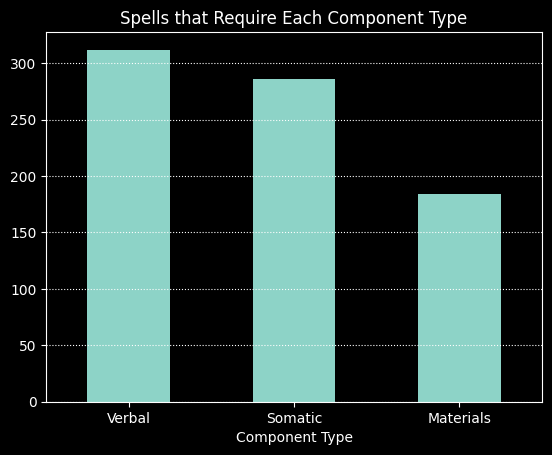

In [258]:
has_components.plot(kind='bar', x='Component Type', legend=None)
plt.grid(axis = 'y', linestyle=':')
plt.xticks(rotation=0)
plt.title('Spells that Require Each Component Type')
plt.show()


Some spells can be cast as a ritual. Some require "concentration" when they are cast. Here I determine what percentage of spells can be cast as a rituual, and what percentage require concentration.

In [259]:
is_ritual = pd.Series.to_list(spells['ritual'].value_counts())

is_concentration = pd.Series.to_list(spells['concentration'].value_counts())

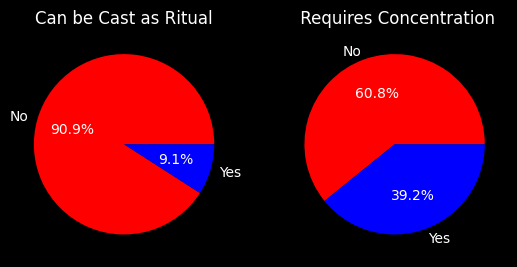

In [260]:
fig, axs = plt.subplots(1, 2)

axs[0].pie(is_ritual, labels = ["No","Yes"], colors = ["red", "blue"], autopct='%1.1f%%')
axs[0].title.set_text("Can be Cast as Ritual")

axs[1].pie(is_concentration, labels = ["No","Yes"], colors = ["red", "blue"], autopct='%1.1f%%')
axs[1].title.set_text(" Requires Concentration")

plt.show()


Each character class can cast only certain spells, but some spells can be cast by multiple classes. Here, I determine how many spells each class can cast.

In [261]:
class_spells = pd.DataFrame({'Class' : ['Bard','Cleric', 'Druid', 'Paladin', 'Ranger','Sorcerer', 'Warlock', 'Wizard'], 
                               'count' : [spells['class'].str.count('Bard').sum(),
                                          spells['class'].str.count('Cleric').sum(),
                                          spells['class'].str.count('Druid').sum(),
                                          spells['class'].str.count('Paladin').sum(),
                                          spells['class'].str.count('Ranger').sum(),
                                          spells['class'].str.count('Sorcerer').sum(),
                                          spells['class'].str.count('Warlock').sum(),
                                          spells['class'].str.count('Wizard').sum()]})

class_spells

,Class,count
0,Bard,112
1,Cleric,143
2,Druid,125
3,Paladin,54
4,Ranger,37
5,Sorcerer,120
6,Warlock,89
7,Wizard,204


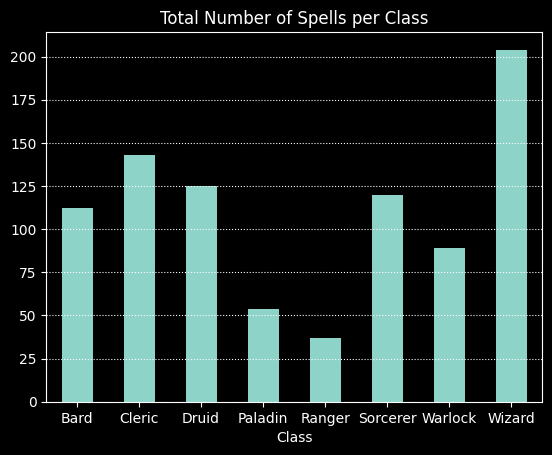

In [262]:
class_spells.plot(kind='bar', x='Class', legend=None)
plt.grid(axis = 'y', linestyle=':')
plt.xticks(rotation=0)
plt.title('Total Number of Spells per Class')
plt.show()

Each spell has a spell level, ranging from 0 to 9.
Here we determine how many spells there are of each level.

In [266]:
spell_level = spells['level'].value_counts().sort_index()
spell_level

0    24
1    49
2    54
3    42
4    31
5    37
6    31
7    20
8    16
9    15
Name: level, dtype: int64

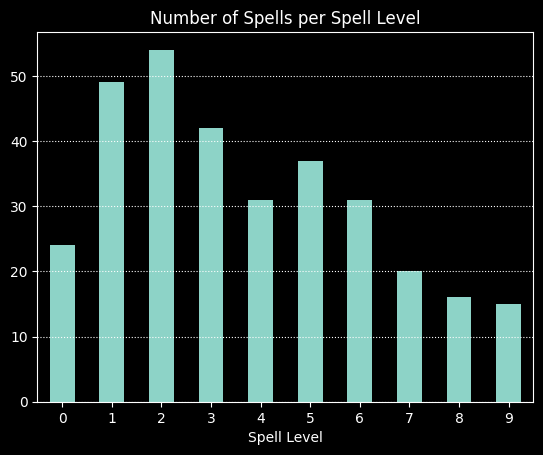

In [269]:
spell_level.plot(kind='bar')
plt.grid(axis = 'y', linestyle=':')
plt.xticks(rotation=0)
plt.xlabel('Spell Level')
plt.title('Number of Spells per Spell Level')
plt.show()

In [270]:
spells.head()

,key,name,desc,higher_level,range,components,duration,casting_time,level,school,class,ritual,concentration,damage_type,damage.damage_at_slot_level.2,damage.damage_at_slot_level.3,damage.damage_at_slot_level.4,damage.damage_at_slot_level.5,damage.damage_at_slot_level.6,damage.damage_at_slot_level.7,damage.damage_at_slot_level.8,damage.damage_at_slot_level.9,damage.damage_at_character_level.1,damage.damage_at_character_level.5,damage.damage_at_character_level.11,damage.damage_at_character_level.17,heal_at_slot_level.2,heal_at_slot_level.3,heal_at_slot_level.4,heal_at_slot_level.5,heal_at_slot_level.6,heal_at_slot_level.7,heal_at_slot_level.8,heal_at_slot_level.9,area_of_effect.type,area_of_effect.size,damage.damage_at_slot_level.1,heal_at_slot_level.1
0,acid-arrow,Acid Arrow,A shimmering green arrow streaks toward a targ...,When you cast this spell using a spell slot of...,90 feet,"V, S, M",Instantaneous,1 action,2,Evocation,"Druid, Wizard",False,False,Acid,4d4,5d4,6d4,7d4,8d4,9d4,10d4,11d4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,acid-splash,Acid Splash,You hurl a bubble of acid. Choose one creature...,,60 feet,"V, S",Instantaneous,1 action,0,Conjuration,"Sorcerer, Wizard",False,False,Acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d6,2d6,3d6,4d6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aid,Aid,Your spell bolsters your allies with toughness...,When you cast this spell using a spell slot of...,30 feet,"V, S, M",8 hours,1 action,2,Abjuration,"Cleric, Paladin",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,10,15,20,25,30,35,40,NaN,NaN,NaN,NaN
3,alarm,Alarm,You set an alarm against unwanted intrusion. C...,,30 feet,"V, S, M",8 hours,1 minute,1,Abjuration,"Ranger, Ritual Caster, Wizard",True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cube,20.0,NaN,NaN
4,alter-self,Alter Self,You assume a different form. When you cast the...,,Self,"V, S",Up to 1 hour,1 action,2,Transmutation,"Sorcerer, Wizard",False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get only Cantrips that deal damage

In [307]:
cantrips = spells.loc[spells['level'] == 0]
cantrips.dropna(subset=['damage.damage_at_character_level.1'], inplace=True)
cantrips.head()

C:\Users\Adam\AppData\Local\Temp\ipykernel_1060\2156705191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cantrips.dropna(subset=['damage.damage_at_character_level.1'], inplace=True)


,key,name,desc,higher_level,range,components,duration,casting_time,level,school,class,ritual,concentration,damage_type,damage.damage_at_slot_level.2,damage.damage_at_slot_level.3,damage.damage_at_slot_level.4,damage.damage_at_slot_level.5,damage.damage_at_slot_level.6,damage.damage_at_slot_level.7,damage.damage_at_slot_level.8,damage.damage_at_slot_level.9,damage.damage_at_character_level.1,damage.damage_at_character_level.5,damage.damage_at_character_level.11,damage.damage_at_character_level.17,heal_at_slot_level.2,heal_at_slot_level.3,heal_at_slot_level.4,heal_at_slot_level.5,heal_at_slot_level.6,heal_at_slot_level.7,heal_at_slot_level.8,heal_at_slot_level.9,area_of_effect.type,area_of_effect.size,damage.damage_at_slot_level.1,heal_at_slot_level.1
1,acid-splash,Acid Splash,You hurl a bubble of acid. Choose one creature...,,60 feet,"V, S",Instantaneous,1 action,0,Conjuration,"Sorcerer, Wizard",False,False,Acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d6,2d6,3d6,4d6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,chill-touch,Chill Touch,"You create a ghostly, skeletal hand in the spa...",,120 feet,"V, S",1 round,1 action,0,Necromancy,"Sorcerer, Warlock, Wizard",False,False,Necrotic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d8,2d8,3d8,4d8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,eldritch-blast,Eldritch Blast,A beam of crackling energy streaks toward a cr...,,120 feet,"V, S",Instantaneous,1 action,0,Evocation,Warlock,False,False,Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d10,2d10,3d10,4d10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,fire-bolt,Fire Bolt,You hurl a mote of fire at a creature or objec...,,120 feet,"V, S",Instantaneous,1 action,0,Evocation,"Sorcerer, Wizard",False,False,Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d10,2d10,3d10,4d10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,poison-spray,Poison Spray,You extend your hand toward a creature you can...,,10 feet,"V, S",Instantaneous,1 action,0,Conjuration,"Druid, Sorcerer, Warlock, Wizard",False,False,Poison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1d12,2d12,3d12,4d12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [308]:
cantrips.columns

Index(['key', 'name', 'desc', 'higher_level', 'range', 'components',
       'duration', 'casting_time', 'level', 'school', 'class', 'ritual',
       'concentration', 'damage_type', 'damage.damage_at_slot_level.2',
       'damage.damage_at_slot_level.3', 'damage.damage_at_slot_level.4',
       'damage.damage_at_slot_level.5', 'damage.damage_at_slot_level.6',
       'damage.damage_at_slot_level.7', 'damage.damage_at_slot_level.8',
       'damage.damage_at_slot_level.9', 'damage.damage_at_character_level.1',
       'damage.damage_at_character_level.5',
       'damage.damage_at_character_level.11',
       'damage.damage_at_character_level.17', 'heal_at_slot_level.2',
       'heal_at_slot_level.3', 'heal_at_slot_level.4', 'heal_at_slot_level.5',
       'heal_at_slot_level.6', 'heal_at_slot_level.7', 'heal_at_slot_level.8',
       'heal_at_slot_level.9', 'area_of_effect.type', 'area_of_effect.size',
       'damage.damage_at_slot_level.1', 'heal_at_slot_level.1'],
      dtype='object')

In [309]:
cantrips = cantrips[['key', 'name', 'range', 'damage_type','damage.damage_at_character_level.1' ]]
cantrips

,key,name,range,damage_type,damage.damage_at_character_level.1
1,acid-splash,Acid Splash,60 feet,Acid,1d6
39,chill-touch,Chill Touch,120 feet,Necrotic,1d8
95,eldritch-blast,Eldritch Blast,120 feet,Force,1d10
115,fire-bolt,Fire Bolt,120 feet,Fire,1d10
221,poison-spray,Poison Spray,10 feet,Poison,1d12
230,produce-flame,Produce Flame,Self,Fire,1d8
239,ray-of-frost,Ray of Frost,60 feet,Cold,1d8
249,sacred-flame,Sacred Flame,60 feet,Radiant,1d8
263,shocking-grasp,Shocking Grasp,Touch,Lightning,1d8
303,vicious-mockery,Vicious Mockery,60 feet,Psychic,1d4


In [310]:
cantrips[['dice_roll','dice_size']]= cantrips['damage.damage_at_character_level.1'].str.split('d', expand=True)
cantrips

C:\Users\Adam\AppData\Local\Temp\ipykernel_1060\619598352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cantrips[['dice_roll','dice_size']]= cantrips['damage.damage_at_character_level.1'].str.split('d', expand=True)
C:\Users\Adam\AppData\Local\Temp\ipykernel_1060\619598352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cantrips[['dice_roll','dice_size']]= cantrips['damage.damage_at_character_level.1'].str.split('d', expand=True)


,key,name,range,damage_type,damage.damage_at_character_level.1,dice_roll,dice_size
1,acid-splash,Acid Splash,60 feet,Acid,1d6,1,6
39,chill-touch,Chill Touch,120 feet,Necrotic,1d8,1,8
95,eldritch-blast,Eldritch Blast,120 feet,Force,1d10,1,10
115,fire-bolt,Fire Bolt,120 feet,Fire,1d10,1,10
221,poison-spray,Poison Spray,10 feet,Poison,1d12,1,12
230,produce-flame,Produce Flame,Self,Fire,1d8,1,8
239,ray-of-frost,Ray of Frost,60 feet,Cold,1d8,1,8
249,sacred-flame,Sacred Flame,60 feet,Radiant,1d8,1,8
263,shocking-grasp,Shocking Grasp,Touch,Lightning,1d8,1,8
303,vicious-mockery,Vicious Mockery,60 feet,Psychic,1d4,1,4


In [312]:
cantrips.dtypes

key                                   object
name                                  object
range                                 object
damage_type                           object
damage.damage_at_character_level.1    object
dice_roll                             object
dice_size                             object
dtype: object

In [319]:
cantrips = cantrips.astype({'dice_roll' : 'int', 'dice_size' : 'int'})

In [322]:
cantrips.dtypes

key                                    object
name                                   object
range                                  object
damage_type                            object
damage.damage_at_character_level.1     object
dice_roll                               int32
dice_size                               int32
average_damage                        float64
dtype: object

In [321]:
cantrips['average_damage'] = cantrips['dice_roll'] * (cantrips['dice_size'] * 0.5)
cantrips

,key,name,range,damage_type,damage.damage_at_character_level.1,dice_roll,dice_size,average_damage
1,acid-splash,Acid Splash,60 feet,Acid,1d6,1,6,3.0
39,chill-touch,Chill Touch,120 feet,Necrotic,1d8,1,8,4.0
95,eldritch-blast,Eldritch Blast,120 feet,Force,1d10,1,10,5.0
115,fire-bolt,Fire Bolt,120 feet,Fire,1d10,1,10,5.0
221,poison-spray,Poison Spray,10 feet,Poison,1d12,1,12,6.0
230,produce-flame,Produce Flame,Self,Fire,1d8,1,8,4.0
239,ray-of-frost,Ray of Frost,60 feet,Cold,1d8,1,8,4.0
249,sacred-flame,Sacred Flame,60 feet,Radiant,1d8,1,8,4.0
263,shocking-grasp,Shocking Grasp,Touch,Lightning,1d8,1,8,4.0
303,vicious-mockery,Vicious Mockery,60 feet,Psychic,1d4,1,4,2.0
